In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
np.random.seed(1234)
import pymc
import scipy.stats as stats

## Estimating parameters of a linear (and nonlinear) regreession model
(http://people.duke.edu/~ccc14/sta-663/PyMC2.html)

In [63]:
#@pymc.deterministic 
def mu1(a=a, b=b, x=x):
    
    return a*x**2 + b

In [81]:
def mu1(a=a, b=b, x=x): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    suma =0.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*x))
    return b*(1+2.0*suma)

In [94]:
# observed data
n = 40
a = 0.5
b = 2
sigma = 0.02
x = np.linspace(0.01, 2, n)
y_obs = mu1(a, b, x) + np.random.normal(0, sigma, n)
data = pd.DataFrame(np.array([x, y_obs]).T, columns=['x', 'y'])

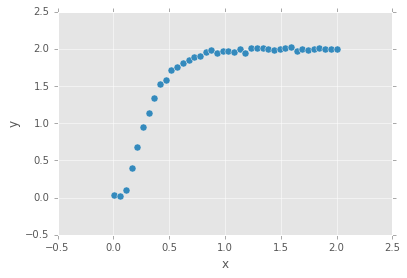

In [95]:
data.plot(x='x', y='y', kind='scatter', s=50);

In [78]:
# define priors
a = pymc.Normal('slope', mu=10, tau=1.0/10**2)
b = pymc.Normal('intercept', mu=0, tau=1.0/10**2)
tau = pymc.Gamma("tau", alpha=0.1, beta=0.1)

# define likelihood
@pymc.deterministic
#def mu(a=a, b=b, x=x):
#    return a*x**2 + b


y = pymc.Normal('y', mu=mu, tau=tau, value=y_obs, observed=True)

# inference
m = pymc.Model([a, b, tau, x, y])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)

 [-----------------100%-----------------] 11000 of 11000 complete in 2.7 sec

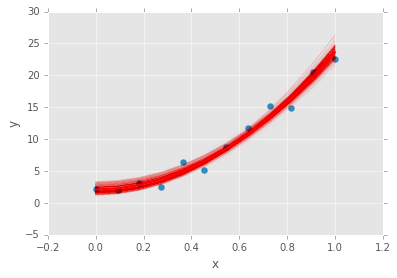

In [79]:
abar = a.stats()['mean']
bbar = b.stats()['mean']
data.plot(x='x', y='y', kind='scatter', s=50);
xp = np.array(x)  #[x.min(), x.max()])
plt.plot(xp, a.trace()*xp[:, None]**2 + b.trace(), c='red', alpha=0.01)
plt.plot(xp, abar*xp**2 + bbar, linewidth=2, c='red');

Plotting tau
Plotting slope
Plotting intercept


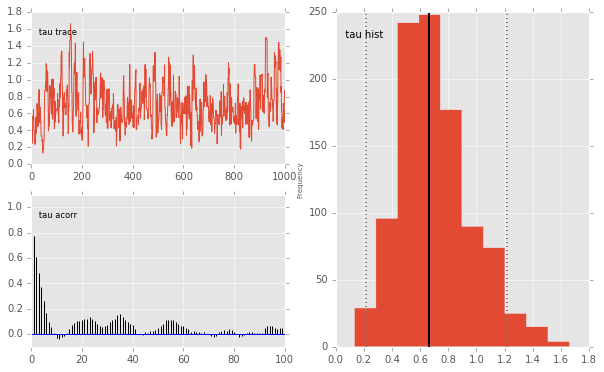

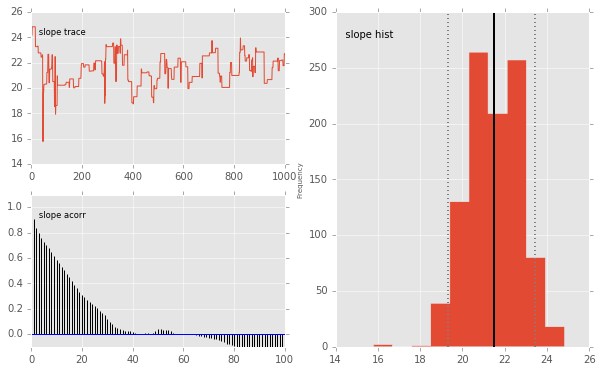

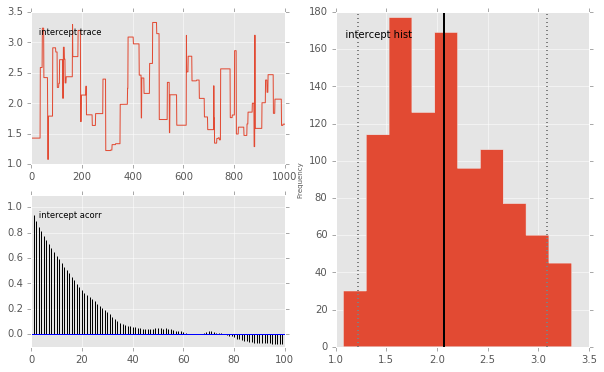

In [80]:
pymc.Matplot.plot(mc)